In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2499/-2.0-1.0.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2499/0.5-3.5.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2499/3.0-6.0.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2499/5.5-8.5.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2499/8.0-11.0.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2499/10.5-12.5.npy


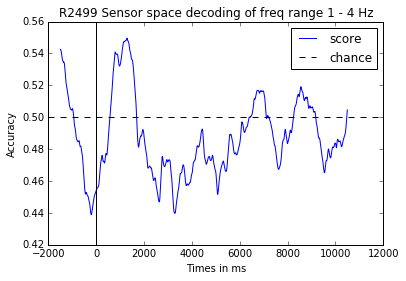

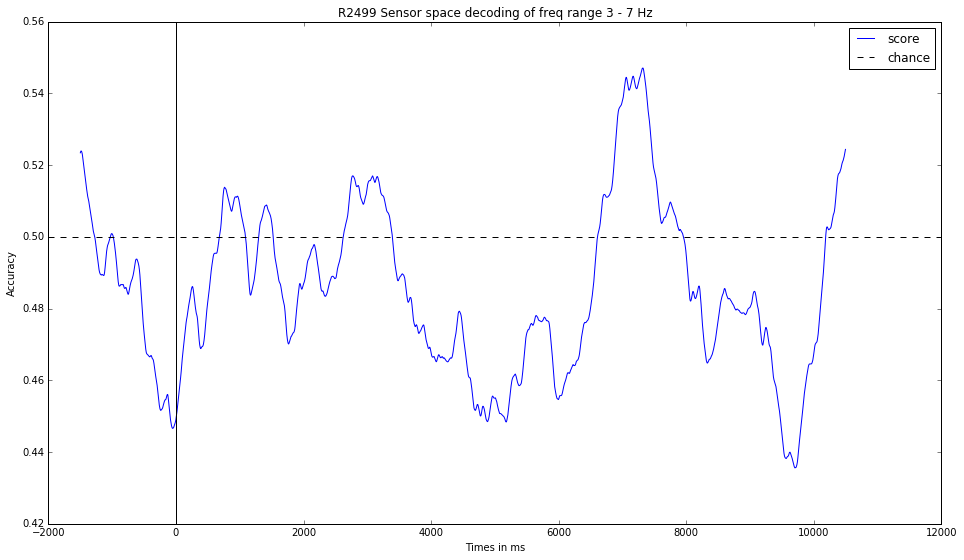

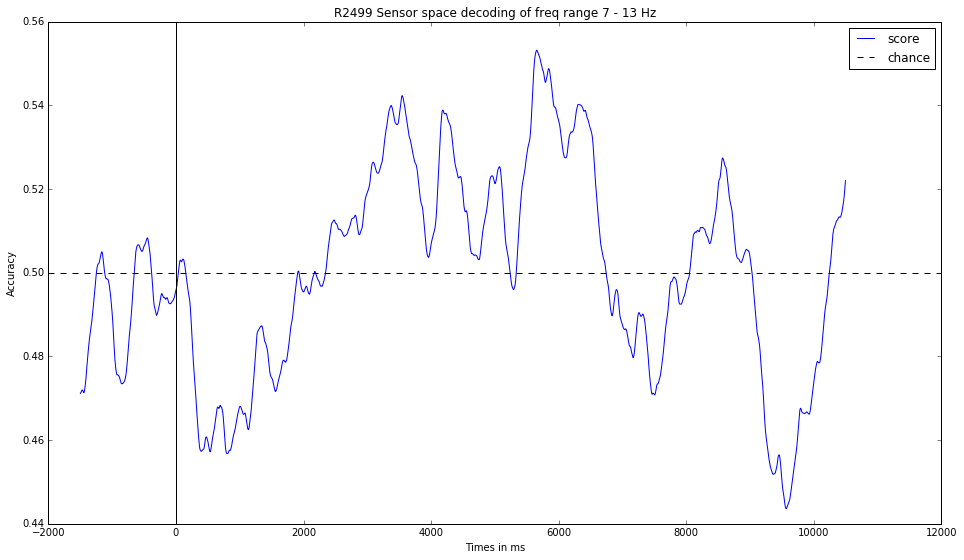

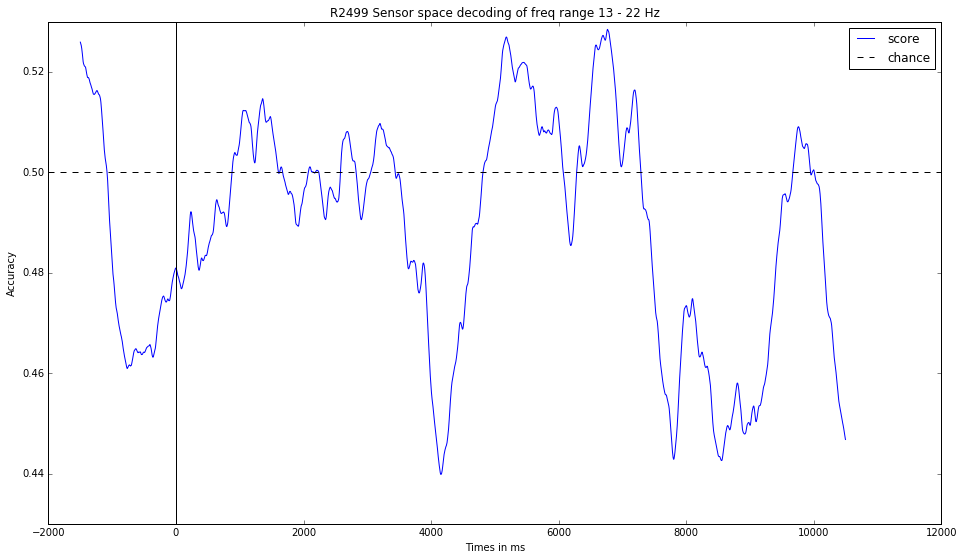

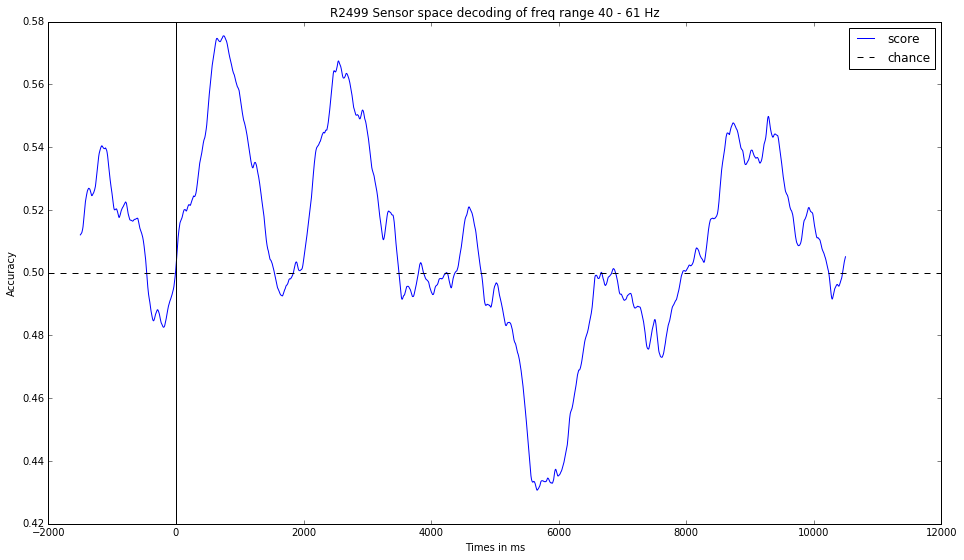

/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2501/-2.0-1.0.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2501/0.5-3.5.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2501/3.0-6.0.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2501/5.5-8.5.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2501/8.0-11.0.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2501/10.5-12.5.npy


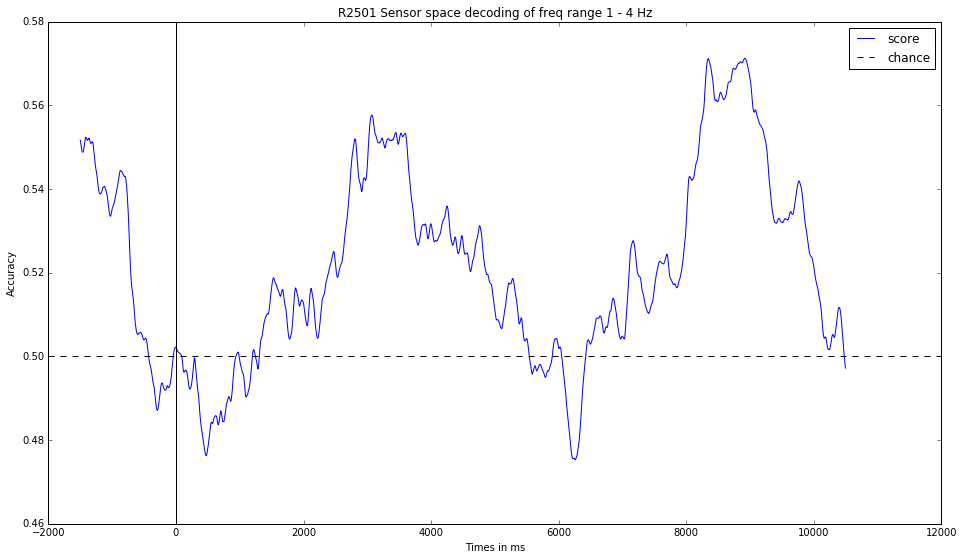

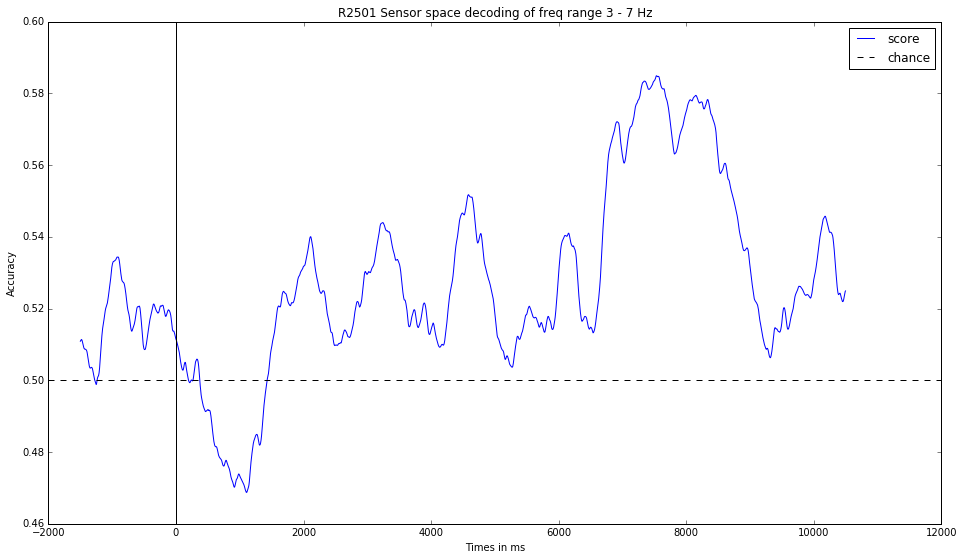

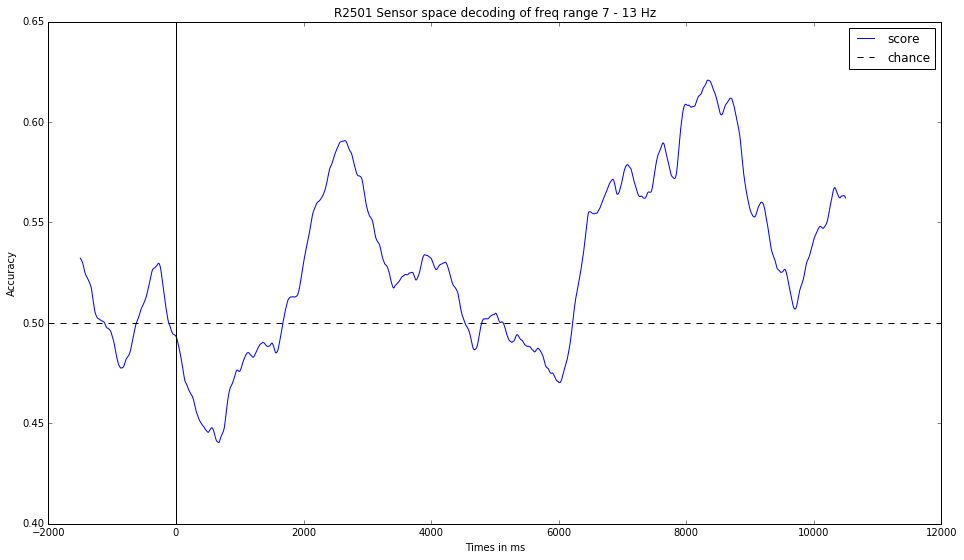

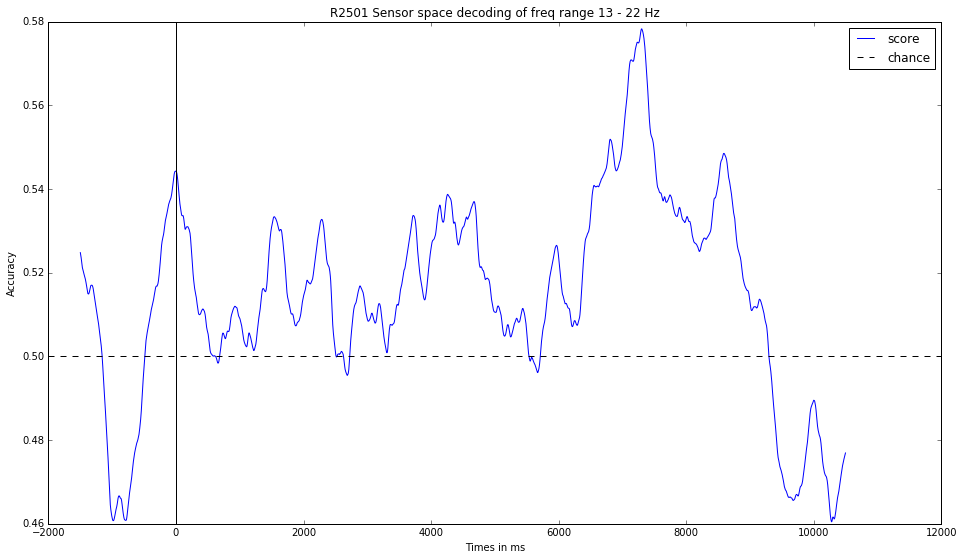

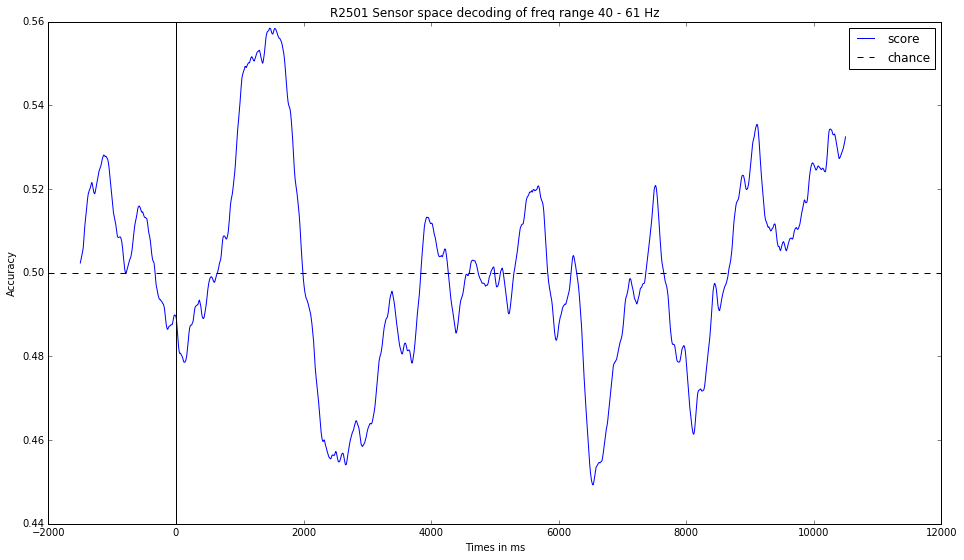

/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2504/-2.0-1.0.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2504/0.5-3.5.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2504/3.0-6.0.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2504/5.5-8.5.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2504/8.0-11.0.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2504/10.5-12.5.npy


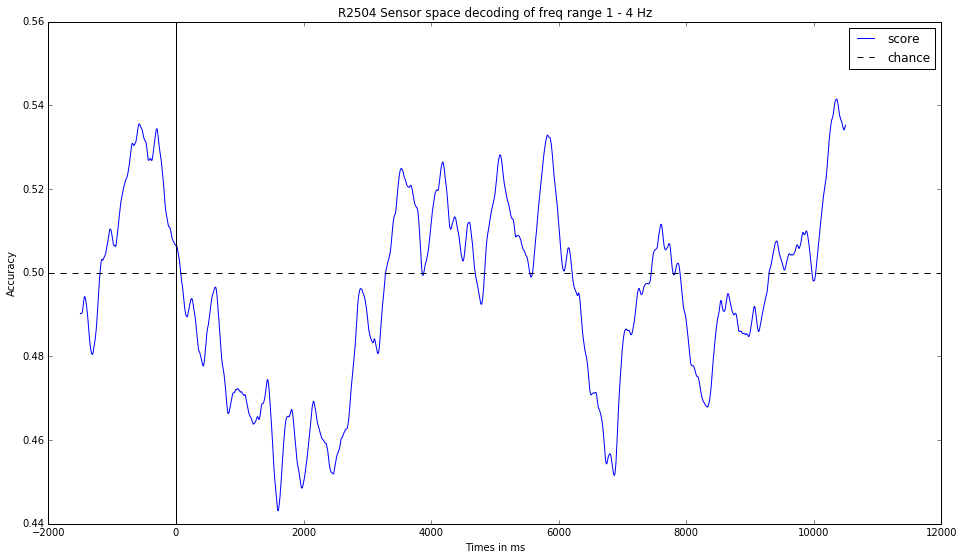

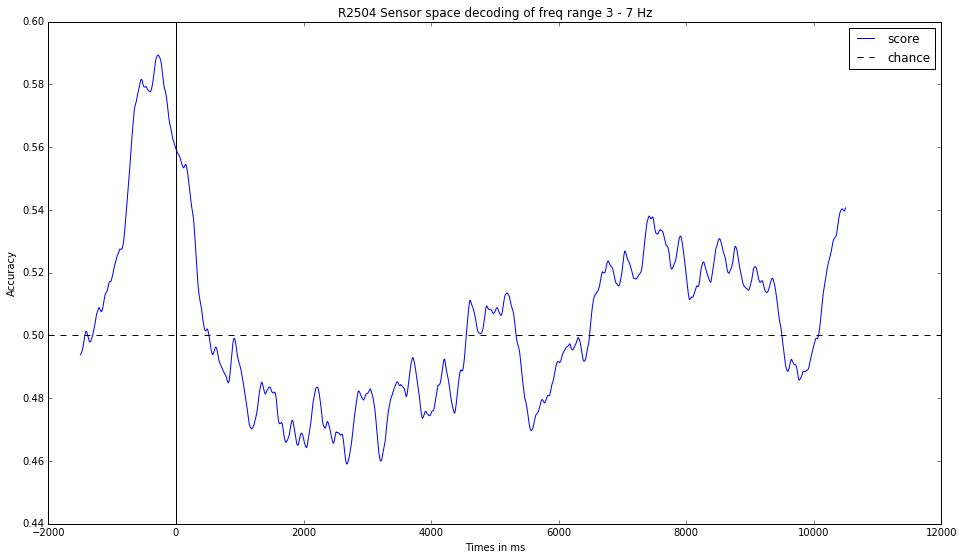

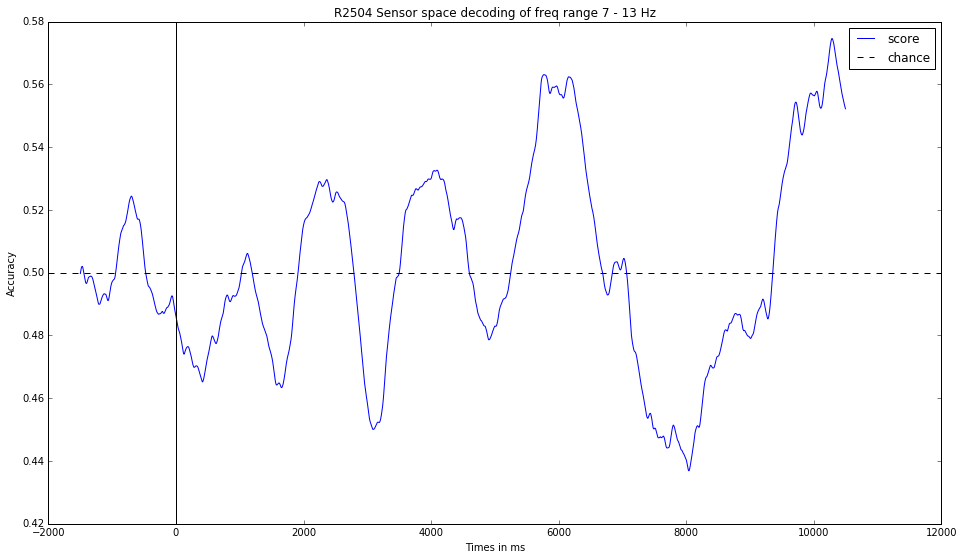

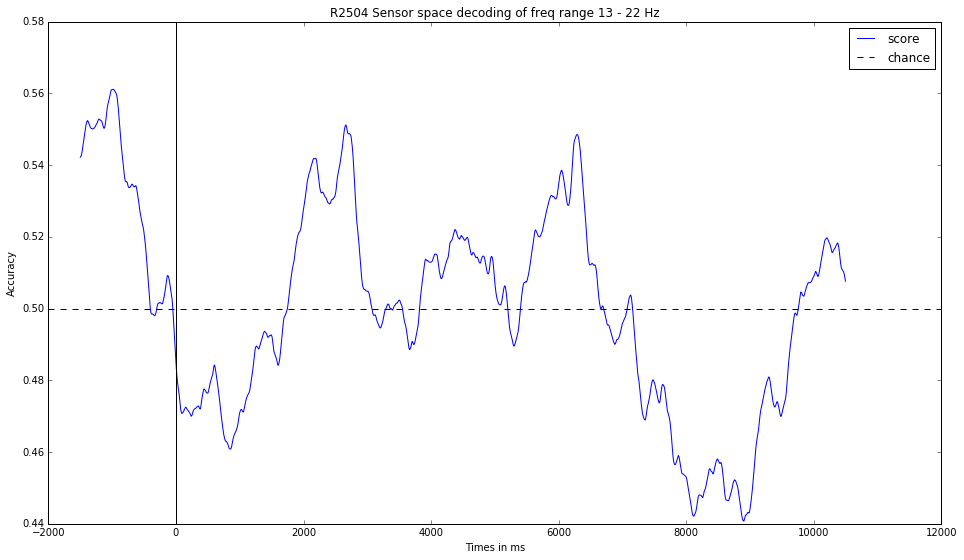

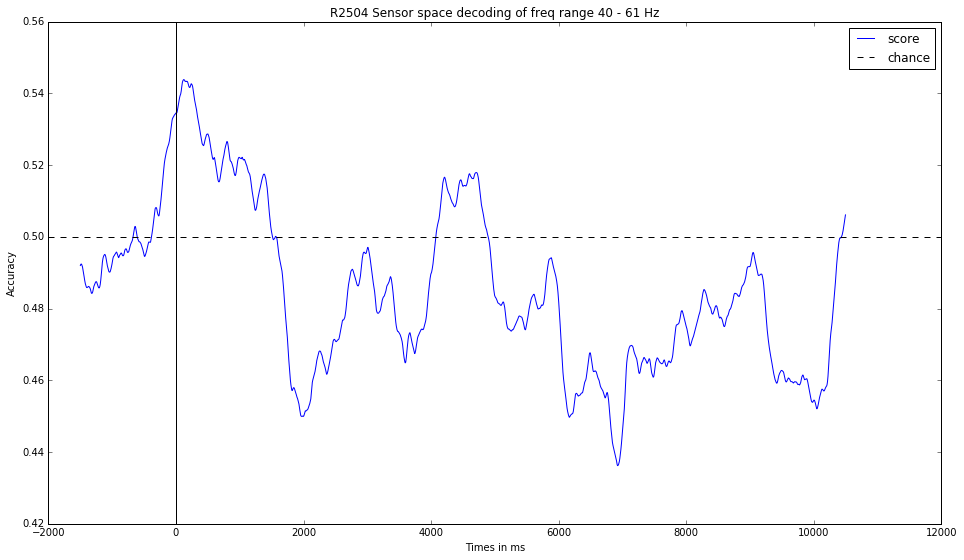

/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2505/-2.0-1.0.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2505/0.5-3.5.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2505/3.0-6.0.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2505/5.5-8.5.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2505/8.0-11.0.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2505/10.5-12.5.npy


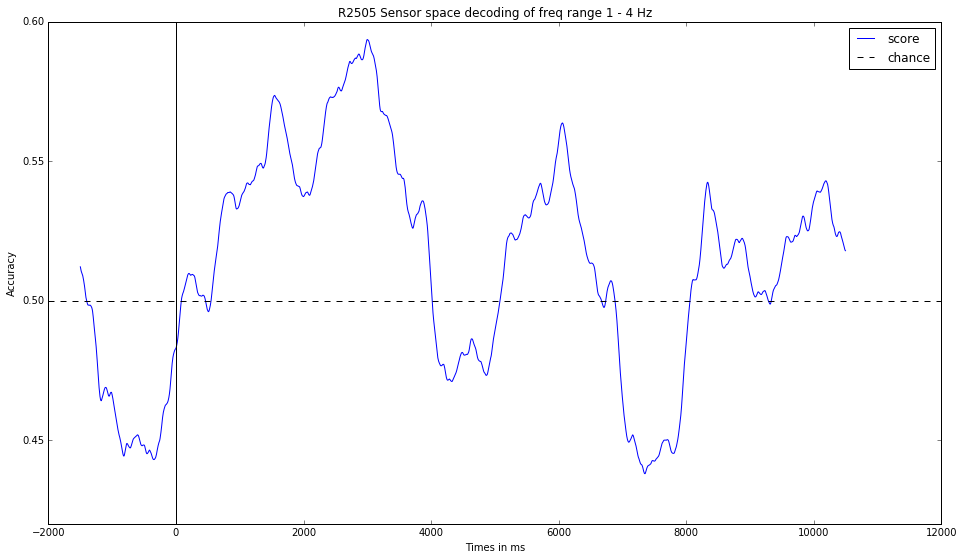

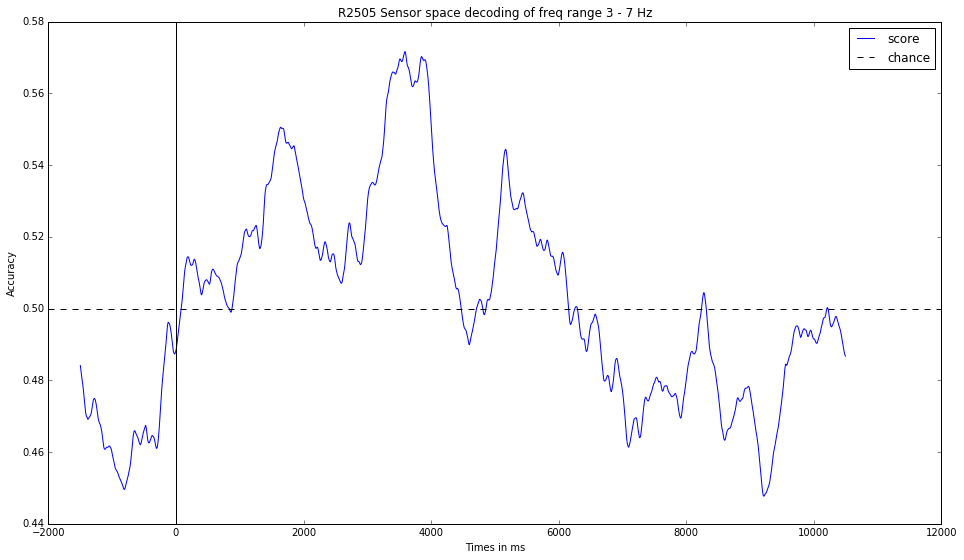

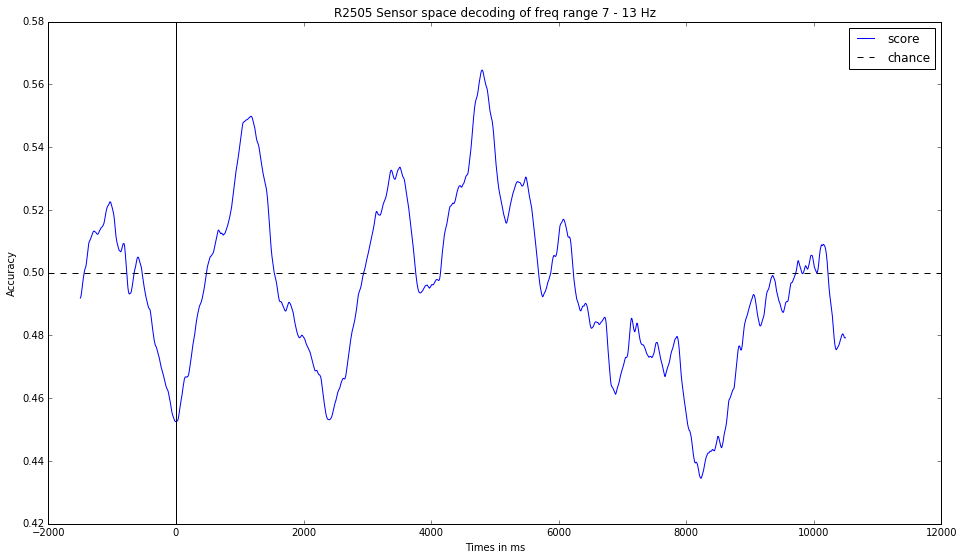

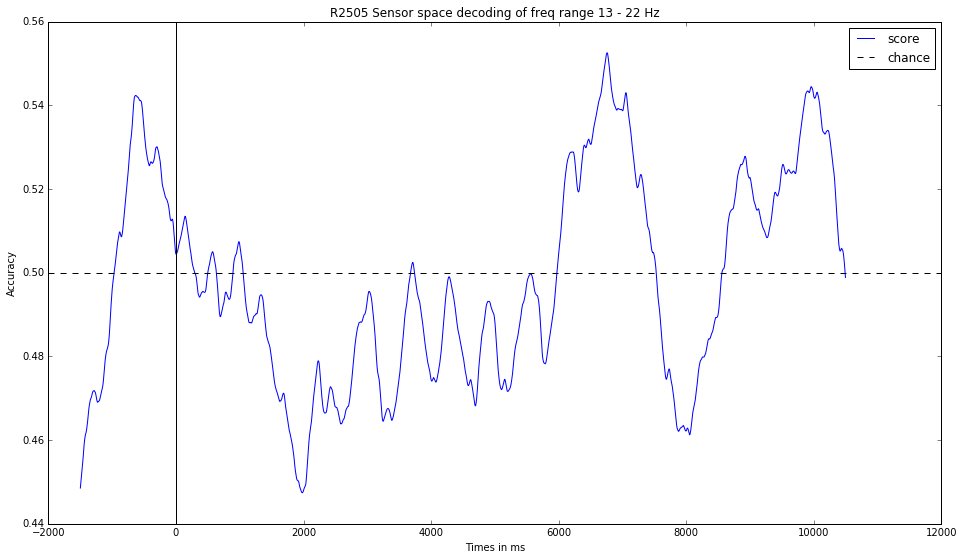

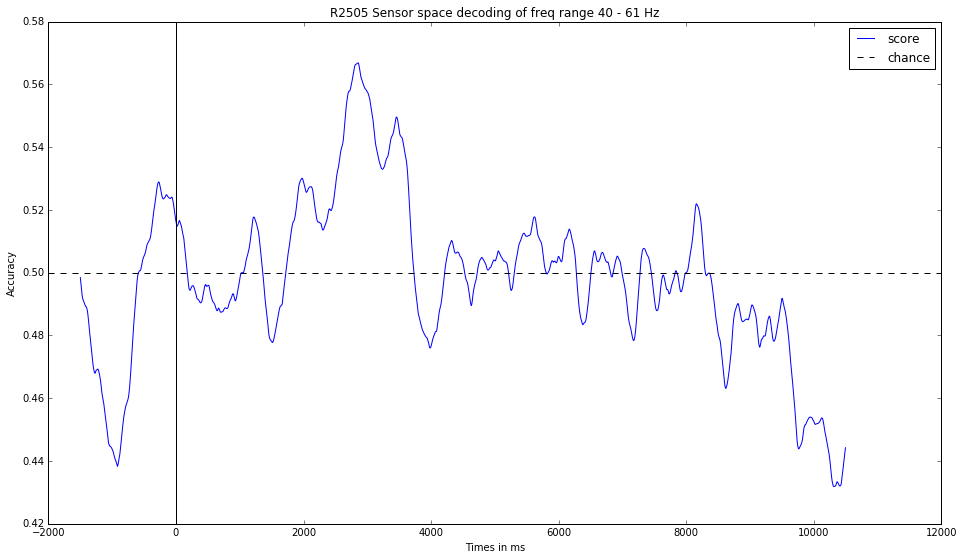

/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2507/-2.0-1.0.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2507/0.5-3.5.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2507/3.0-6.0.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2507/5.5-8.5.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2507/8.0-11.0.npy
/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2507/10.5-12.5.npy


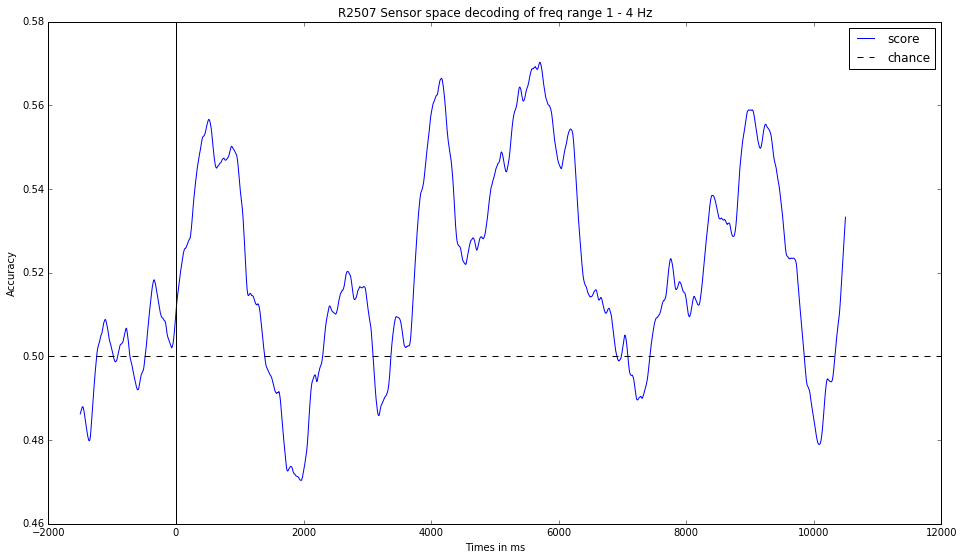

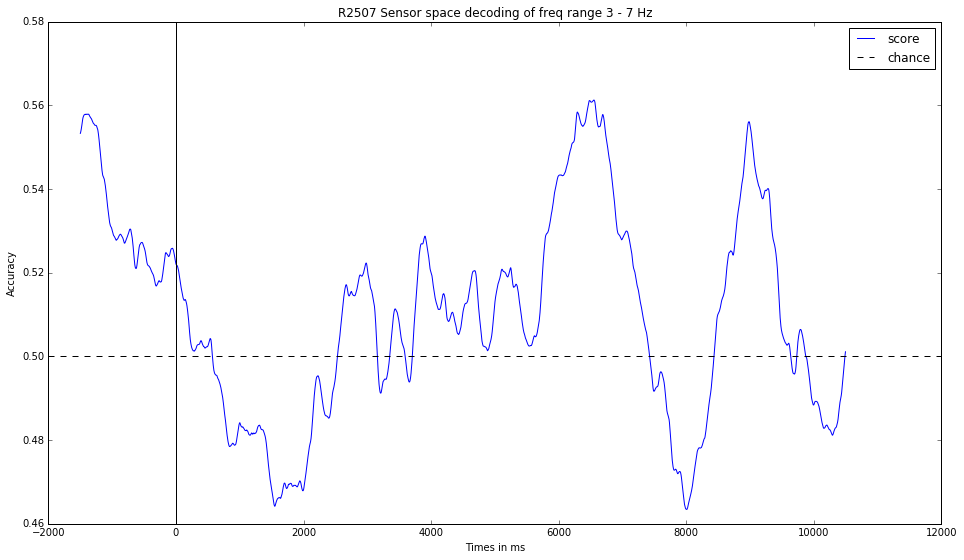

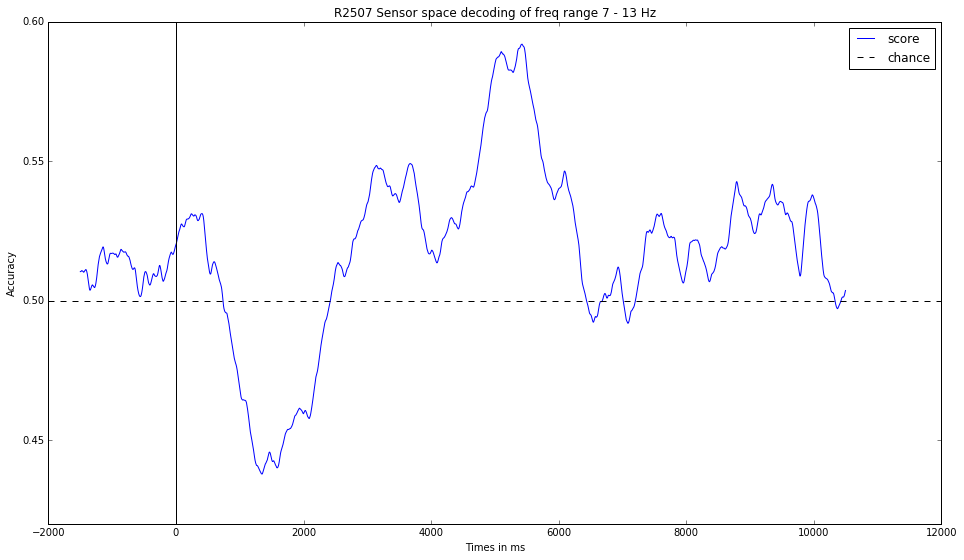

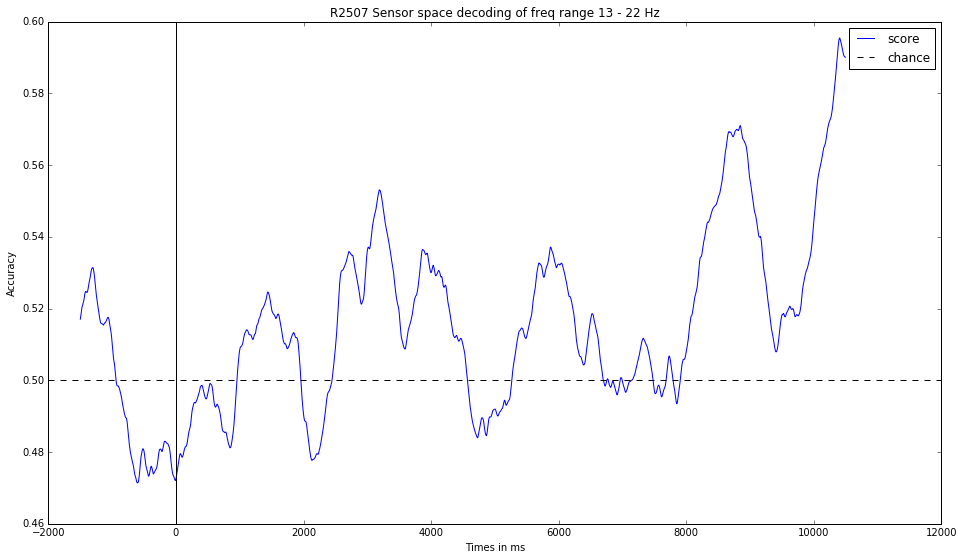

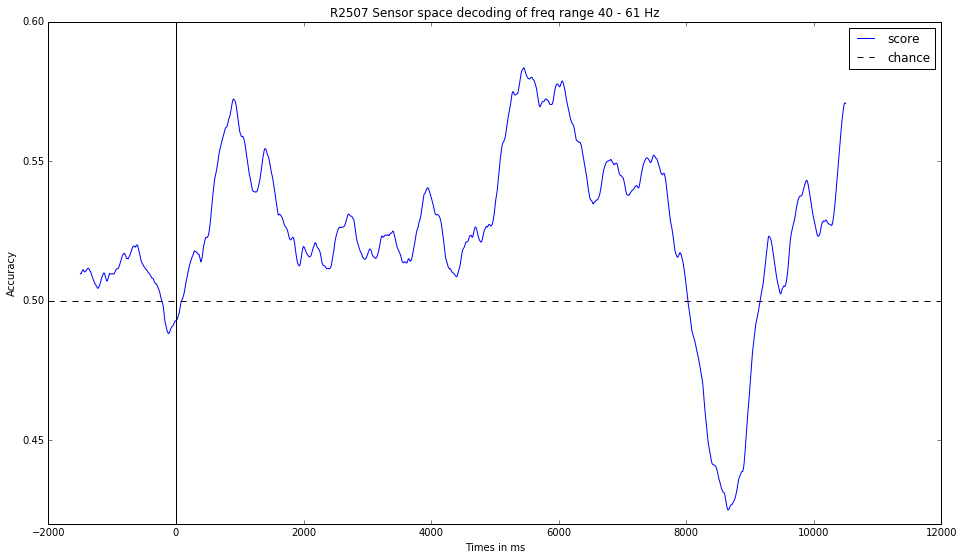

In [3]:
# Main function
datasets = np.array([[499],[501],[504],[505],[507]])
for j in range(datasets.shape[0]):
    delay = np.array([[-2,1],[0.5,3.5],[3,6],[5.5,8.5],[8,11],[10.5,12.5]])
    P = []
    
    for i in range(delay.shape[0]):
        np_file = ("/home/analogicalnexus/chethan/MEG-scripts/s1_s3_left/R2%d/%s-%s.npy")%(datasets[j],delay[i,0], delay[i,1])
        print(np_file)
        P.append(np.load(np_file))
        
    X = np.concatenate((P[0],P[1],P[2],P[3],P[4],P[5]), axis=1)
        
    freqs = np.array([[1,4],[3,7],[7,13],[13,22],[40,61],[70,141]])
        
    for i in range(5):
            # Plot
        #     plt.subplots(1,2, gridspec_kw = {'width_ratios':[3, 1]})
        #     fig, ax = plt.subplots( gridspec_kw = {'height_ratios':[5, 10]})
        X_av = []
        X_av = movingaverage(X[i,:7000], 500)
        fig, ax = plt.subplots()
        plt.rcParams["figure.figsize"] = [16,9]
        ax.plot(range(-1500,10500,2), X_av[500:6500], label='score')
        ax.axhline(.5, color='k', linestyle='--', label='chance')
        ax.set_xlabel('Times in ms')
        ax.set_ylabel('Accuracy')  # Area Under the Curve
        ax.legend()
        ax.axvline(.0, color='k', linestyle='-')
        #     (r'Histogram of IQ: $\mu=100$, $\sigma=15$'
        ax.set_title('R2%d Sensor space decoding of freq range %s - %s Hz'%(datasets[j], freqs[i,0], freqs[i,1]))
        plt.show()
        fig.savefig('/home/analogicalnexus/chethan/MEG-scripts/s1_s3/R2%d/%s-%sHz.png'%(datasets[j], freqs[i,0], freqs[i,1]))

        

In [4]:

X.shape


(6, 7012)

In [5]:
# fig.savefig('myfig.png')

In [6]:
# freqs = np.array([[1,4],[3,7],[7,13],[13,22],[40,61],[70,141]])
# fig, ax = plt.subplots()
# plt.rcParams["figure.figsize"] = [16,9]
# for i in range(4):
#     # Plot
# #     plt.subplots(1,2, gridspec_kw = {'width_ratios':[3, 1]})
# #     fig, ax = plt.subplots( gridspec_kw = {'height_ratios':[5, 10]})
#     X_av = []
#     X_av = movingaverage(X[i,:3500], 100)
#     ax.plot(range(5000,12000,2), X_av, label='score')
    
# ax.axhline(.5, color='k', linestyle='--', label='chance')
# ax.set_xlabel('Times in ms')
# ax.set_ylabel('Accuracy')  # Area Under the Curve
# ax.legend()
# ax.axvline(.0, color='k', linestyle='-')
# #     (r'Histogram of IQ: $\mu=100$, $\sigma=15$'
# ax.set_title('Sensor space decoding of freq range')
# plt.show()